In [69]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [70]:
with open('../../spbu-ai-fundamentals/config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

В этой теме мы поработаем с данными, посвященными определению рака молочной железы на основе различных признаков анализа клеток в биопсии (радиус, кривизна, симметрия). Известно, что этот датасет линейно разделим.

In [71]:
df = pd.read_csv(cfg["classification"]["wdbc"])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Задание**: Проведите краткий EDA. Есть ли выбросы в данных, какие столбцы коррелируют больше всего, стоит ли преобразоывавть какие-то признаки? Хватит 3-4 графиков или таблиц (но можно больше).

In [73]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [74]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1}).astype(int)
df.head()

C:\Users\Faste\AppData\Local\Temp\ipykernel_2680\2950225700.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1}).astype(int)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


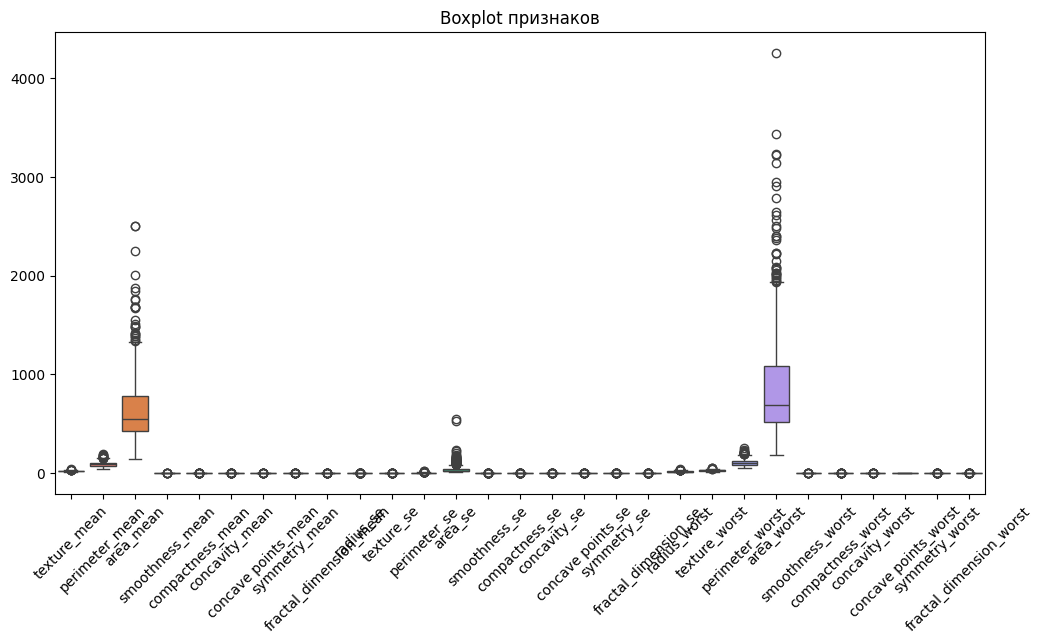

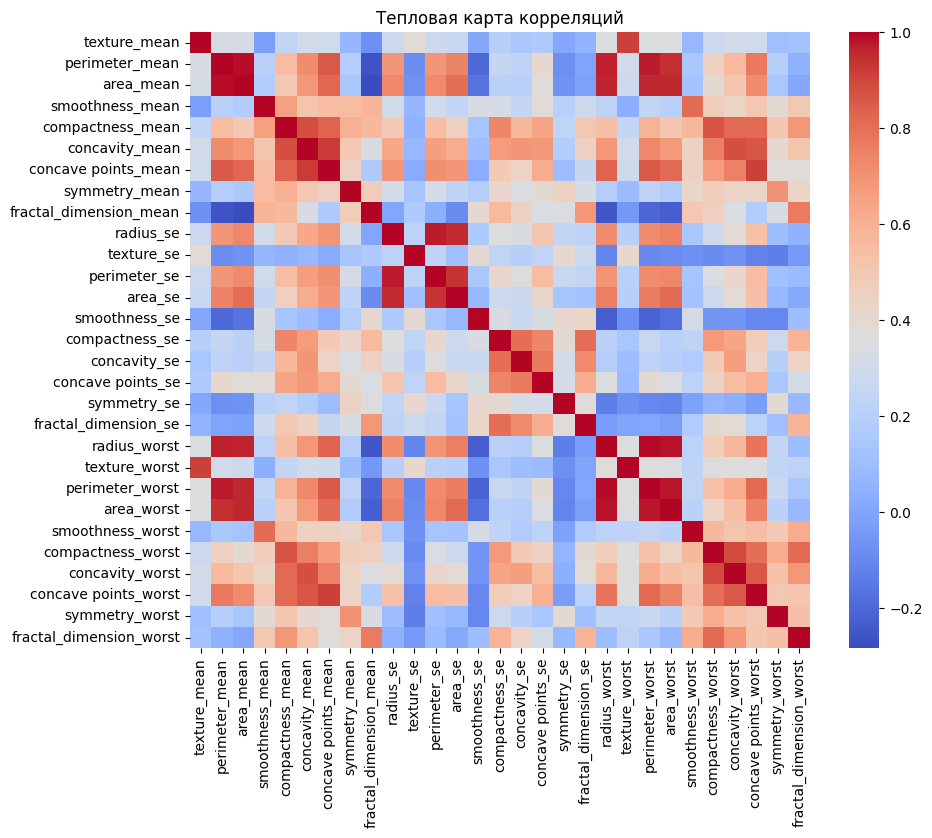

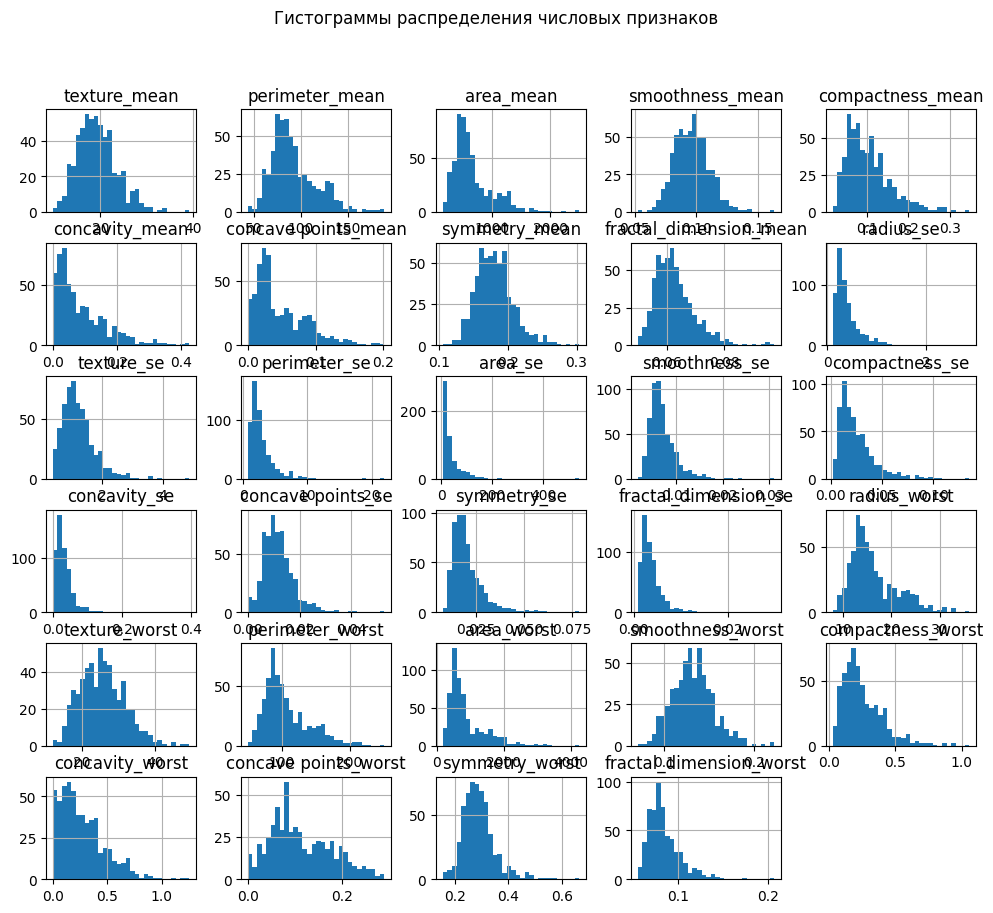

Количество выбросов по каждому признаку:
 texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64


In [75]:
import seaborn as sns

desc_stats = df.describe()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 2:])
plt.xticks(rotation=45)
plt.title("Boxplot признаков")
plt.show()

plt.figure(figsize=(10, 8))
corr_matrix = df.iloc[:, 2:].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Тепловая карта корреляций")
plt.show()

corr_unstacked = corr_matrix.unstack()
sorted_corr = corr_unstacked[(corr_unstacked < 1) & (corr_unstacked > 0.75)].sort_values(ascending=False)
sorted_corr[:10]

df.iloc[:, 2:].hist(figsize=(12, 10), bins=30)
plt.suptitle("Гистограммы распределения числовых признаков")
plt.show()

Q1 = df.iloc[:, 2:].quantile(0.25)
Q3 = df.iloc[:, 2:].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df.iloc[:, 2:] < (Q1 - 1.5 * IQR)) | (df.iloc[:, 2:] > (Q3 + 1.5 * IQR))).sum()
print("Количество выбросов по каждому признаку:\n", outliers)

**Задание**: выведите, сколько в датасете примеров позитивного и негативного класса.

Количество примеров каждого класса:
diagnosis
0    357
1    212
Name: count, dtype: int64


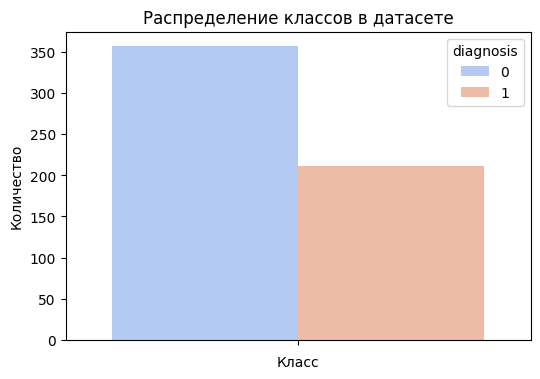

In [76]:
# Подсчет количества примеров каждого класса
class_counts = df["diagnosis"].value_counts()
print("Количество примеров каждого класса:")
print(class_counts)

plt.figure(figsize=(6, 4))
sns.barplot(hue=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.title("Распределение классов в датасете")
plt.show()

In [77]:
target = 'diagnosis'
features = list(df.columns)
features.remove('diagnosis')
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [85]:
X = df[features]
y = df[[target]]

Попробуем обучить логистическую регрессию на этих данных. Обратите внимание, что по умолчанию применяется L2 регуляризация,мы будем строить предсказания без нее. Однако, в качестве упражнения, сравним результаты с масштабированием признаков и без.

**Задание**: оцените, насколько сбалансированы признаки по масштабу. Попробуйте ответить до запуска кода, стоит ли их сначала масштабировать и почему. 

In [79]:
print(df.describe().T[["min", "max", "std"]])

# df.iloc[:, 2:].hist(figsize=(12, 10), bins=30)
# plt.suptitle("Гистограммы распределения числовых признаков")
# plt.show()

                                min         max         std
diagnosis                  0.000000     1.00000    0.483918
radius_mean                6.981000    28.11000    3.524049
texture_mean               9.710000    39.28000    4.301036
perimeter_mean            43.790000   188.50000   24.298981
area_mean                143.500000  2501.00000  351.914129
smoothness_mean            0.052630     0.16340    0.014064
compactness_mean           0.019380     0.34540    0.052813
concavity_mean             0.000000     0.42680    0.079720
concave points_mean        0.000000     0.20120    0.038803
symmetry_mean              0.106000     0.30400    0.027414
fractal_dimension_mean     0.049960     0.09744    0.007060
radius_se                  0.111500     2.87300    0.277313
texture_se                 0.360200     4.88500    0.551648
perimeter_se               0.757000    21.98000    2.021855
area_se                    6.802000   542.20000   45.491006
smoothness_se              0.001713     

Без масштабирования:

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)
clf = LogisticRegression(penalty=None)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

c:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9473684210526315

С масштабированием:

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)
clf = LogisticRegression(penalty=None)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9649122807017544

Все классификаторы в Sklearn имеют два режима - предсказание лейблов и вероятностей. Предсказание вероятностей дает нам необработанные оценки принадлежности к тому или иному классу. Модель в таком случае возвращает вектор (для каждого семпла) размера N (где N - число классов). 

**Вопрос**: Какого размера будет предсказание в случае бинарной логистической регрессии? А многоклассовой? Другими словами, в каких случаях негативный класс добавляется как отдельный?

В бинарной классификации P(Y=0 | X) вычисляется автоматически как 1 - P(Y=1 | X), поэтому он не нужен как отдельный в модели.

В многоклассовой классификации (например, n_classes = 3) вероятность каждого класса не зависит от других, поэтому все классы (включая "негативный") предсказываются отдельно.

In [82]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([0, 1, 0, 1])

clf = LogisticRegression()
clf.fit(X, y)

print("Predict:", clf.predict(X))  # (n_samples,)
print("Predict_proba:", clf.predict_proba(X))  # (n_samples, 2)

Predict: [0 0 1 1]
Predict_proba: [[0.76734722 0.23265278]
 [0.59813353 0.40186647]
 [0.401792   0.598208  ]
 [0.23259747 0.76740253]]


In [83]:
y_multi = np.array([0, 1, 2, 1])
clf.fit(X, y_multi)

print("Predict:", clf.predict(X))  # (n_samples,)
print("Predict_proba:", clf.predict_proba(X))  # (n_samples, 3)


Predict: [0 1 1 1]
Predict_proba: [[0.78937329 0.13506444 0.07556228]
 [0.19433939 0.52740548 0.27825513]
 [0.01527655 0.65755816 0.32716529]
 [0.00099598 0.67995984 0.31904418]]


In [88]:
df_results = pd.DataFrame({
    'pred': clf.predict(X_test).reshape(-1),
    'pred_proba': clf.predict_proba(X_test)[:, 1],
    'true': y_test.reshape(-1),
})

**Задание**: Постройте матрицу предсказаний 100x2 для регрессии с двумя классами, где в каждой строке будут случайные значения. 
1) Получите из этого оценку принадлежности к классу с помощью сигмоиды и софтмакса. 
2) Постройте предсказание класса. В случае сигмоиды предсказывайте принадлежность к классу на основе границы, софтмакса - по максимальной вероятности

**Вопрос***: как еще можно предсказать класс? Всегда ли нужно брать именно эти функции?

In [89]:
import scipy.special

np.random.seed(42)
logits = np.random.randn(100, 2)

sigmoid_probs = 1 / (1 + np.exp(-logits))

softmax_probs = scipy.special.softmax(logits, axis=1)

sigmoid_preds = (sigmoid_probs[:, 1] > 0.5).astype(int)
softmax_preds = np.argmax(softmax_probs, axis=1)

print("Logits (первые 5 строк):\n", logits[:5])
print("\nСигмоидные вероятности:\n", sigmoid_probs[:5])
print("\nСофтмакс вероятности:\n", softmax_probs[:5])
print("\nПредсказания (Сигмоида):\n", sigmoid_preds[:5])
print("\nПредсказания (Софтмакс):\n", softmax_preds[:5])


Logits (первые 5 строк):
 [[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]

Сигмоидные вероятности:
 [[0.62168683 0.46548889]
 [0.65648939 0.82098421]
 [0.44172766 0.44173171]
 [0.829093   0.68296571]
 [0.38474066 0.63240775]]

Софтмакс вероятности:
 [[0.65361745 0.34638255]
 [0.2941441  0.7058559 ]
 [0.4999959  0.5000041 ]
 [0.69248827 0.30751173]
 [0.2665819  0.7334181 ]]

Предсказания (Сигмоида):
 [0 1 0 1 1]

Предсказания (Софтмакс):
 [0 1 1 0 1]


Задание порога (thresholding)  
SVM (Support Vector Machine) с порогом на расстояние до разделяющей гиперплоскости

In [90]:
df_results.head(20)

,pred,pred_proba,true
0,0,1.396118e-237,0
1,0,1.401703e-86,0
2,0,0.000000e+00,0
3,1,1.000000e+00,1
4,0,0.000000e+00,0
5,0,5.978052e-186,0
6,1,1.000000e+00,1
7,0,3.862844e-115,0
8,1,1.000000e+00,1
9,0,1.398690e-75,0


# Метрики классификации


## Метрики на основе лейблов
Рассмотрим, какие у нас могут быть тезультаты классификации.

* TP (true positive) - правильно предсказали: рак есть, что модель и предсказала
* FP (false positive) - неправильно предсказали: рака нет,  а модель предсказала, что есть (1st order error)
* FN (false negative) - неправильно предсказали: рак вообще-то есть,  а модель предсказала, что нет (2nd order error)!
* TN (true negative) - правильно предсказали: рака нет, что модель и предсказала


Pos/Neg - общее количество объектов класса 1/0

Метрики:

* $ \text{Accuracy} = \frac{TP + TN}{Pos+Neg}$ - Доля правильных ответов
* $ \text{Error rate} = 1 -\text{accuracy}$ - Доля ошибок
* $ \text{Precision} =\frac{TP}{TP + FP}$ - Точность
* $ \text{Recall} =\frac{TP}{TP + FN} = \frac{TP}{Pos}$ - Полнота
* $ \text{F}_\beta \text{-score} = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$ F-мера (часто используют F1-меру, где $\beta=1$)

### ROC кривая

ROC кривая измеряет насколько хорошо классификатор разделяет два класса. Она построена на предсказании вероятности. Площадь под ней (ROC-AUC) является неплохой оценкой общего качества предсказаний. 
 
Пусть $y_{\rm i}$ - истинная метрка и $\hat{y}_{\rm i}$ - прогноз вероятности для $i^{\rm th}$ объекта.

Число положительных и отрицательных объектов: $\mathcal{I}_{\rm 1} = \{i: y_{\rm i}=1\}$ and $\mathcal{I}_{\rm 0} = \{i: y_{\rm i}=0\}$.

Для каждого порогового значения вероятности $\tau$ считаем True Positive Rate (TPR) и False Positive Rate (FPR):

\begin{equation}
TPR(\tau) = \frac{1}{I_{\rm 1}} \sum_{i \in \mathcal{I}_{\rm 1}} I[\hat{y}_{\rm i} \ge \tau] = \frac{TP(\tau)}{TP(\tau) + FN(\tau)} = \frac{TP(\tau)}{Pos}
\end{equation}

\begin{equation}
FPR(\tau) = \frac{1}{I_{\rm 0}} \sum_{i \in \mathcal{I}_{\rm 0}} I[\hat{y}_{\rm i} \ge \tau]= \frac{FP(\tau)}{FP(\tau) + TN(\tau)} = \frac{FP(\tau)}{Neg}
\end{equation}

In [91]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Используем для сравнения случайный предикт. Иногда это не худшая стратегия. Если в данных мало сигнала, случайное предсказание может работать лучше ложного.

In [92]:
from sklearn.dummy import DummyClassifier
random_classifier = DummyClassifier(strategy='uniform', random_state=42).fit(X_train, y_train)
y_random = random_classifier.predict_proba(X_test)[:,1]
y_random

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], shape=(3000,))

In [93]:
random_preds = random_classifier.predict(X_test)
random_preds

array([0, 1, 0, ..., 0, 1, 1], shape=(3000,))

Построим 

Random Classifier metrics
AUC-PR: 0.5057
AUC-ROC: 0.5000


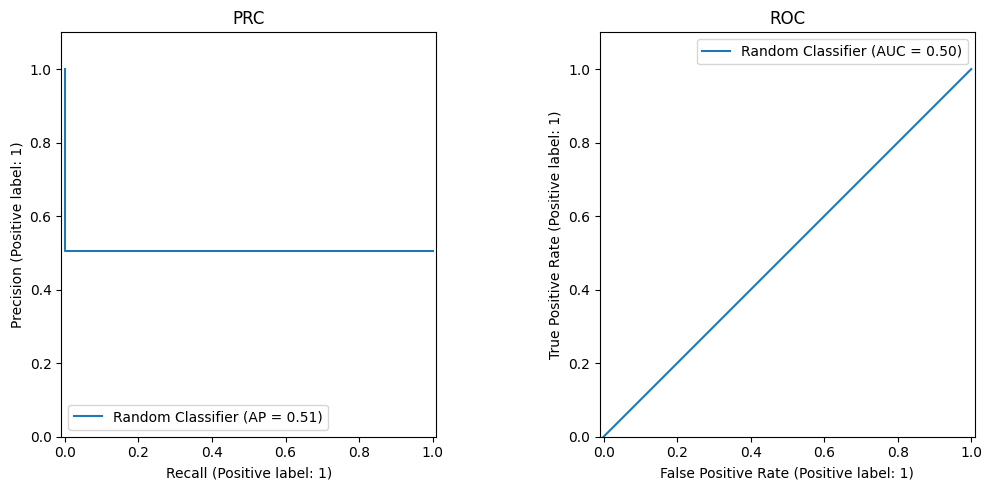

In [95]:
from sklearn.metrics import average_precision_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

def depict_pr_roc(y_true, y_pred, classifier_name='Some Classifier', ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(11, 5))

    print(classifier_name, 'metrics')
    PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax[0], name=classifier_name)
    print('AUC-PR: %.4f' % average_precision_score(y_true, y_pred))
    ax[0].set_title("PRC")
    ax[0].set_ylim(0, 1.1)

    RocCurveDisplay.from_predictions(y_true, y_pred, ax=ax[1], name=classifier_name)
    print('AUC-ROC: %.4f' % roc_auc_score(y_true, y_pred))
    ax[1].set_title("ROC")
    ax[1].set_ylim(0, 1.1)

    plt.tight_layout()
    plt.legend()


depict_pr_roc(y_test, y_random, 'Random Classifier')

Также посчитаем другие метрики на основе лейблов.

**Задание:** Дополните код по рассчету метрик.

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def quality_metrics_report(y_true, y_pred):

    tp = np.sum( (y_true == 1) * (y_pred == 1) )
    fp = np.sum( (y_true == 0) & (y_pred == 1) )
    fn = np.sum( (y_true == 1) & (y_pred == 0) )
    tn = np.sum( (y_true == 0) * (y_pred == 0) )

    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return [tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1]

In [ ]:
# dataframe для сравнения методов классификации по метрикам
df_metrics = pd.DataFrame(
    columns=['acc', 'er', 'precision', 'recall', 'f1', 'auc_pr', 'roc_auc_score', 'reg_const']
)

y_random = np.random.choice([0, 1], size=y_test.shape)
random_preds = np.random.choice([0, 1], size=y_test.shape)

# Для случайного классификатора вычисляем метрики
precision, recall, _ = precision_recall_curve(y_test, y_random)
[tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1] = quality_metrics_report(y_test, random_preds)
df_metrics.loc['Random Classifier'] = [
      accuracy, error_rate, precision, recall, f1,
      average_precision_score(y_test, y_random),
      roc_auc_score(y_test, y_random),
      0,
]

# по аналогии результаты следующих экспериментов можно будет собрать в табличку
df_metrics

,acc,er,precision,recall,f1,auc_pr,roc_auc_score,reg_const
Random Classifier,0.497667,0.502333,0.503388,0.489782,0.496492,0.499045,0.486384,0.0


In [103]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)[:, 1]
y_pred_binary = (y_probs >= 0.5).astype(int)
clf.score(X_test, y_test)

0.7713333333333333

In [105]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)

[tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1] = quality_metrics_report(y_test, y_pred_binary)
df_metrics.loc['Random Classifier'] = [
      accuracy, error_rate, precision, recall, f1,
      average_precision_score(y_test, y_random),
      roc_auc_score(y_test, y_random),
      clf.get_params()['C']
]

df_metrics

,acc,er,precision,recall,f1,auc_pr,roc_auc_score,reg_const
Random Classifier,0.771333,0.228667,0.775713,0.7706,0.773148,0.499045,0.486384,1.0


Согласуются ли метрики? В чем может быть проблема accuracy?

**Задание**: Соберите табличку для разных классификаторов.

**Задание**: Постройте график PR-curve, ROC-curve для лучшего из них

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

df_metrics = pd.DataFrame(
    columns=['acc', 'er', 'precision', 'recall', 'f1', 'auc_pr', 'roc_auc_score', 'reg_const']
)

# Случайный классификатор
y_random = np.random.choice([0, 1], size=y_test.shape)
random_preds = np.random.choice([0, 1], size=y_test.shape)

# Для случайного классификатора вычисляем метрики
precision, recall, _ = precision_recall_curve(y_test, y_random)
[tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1] = quality_metrics_report(y_test, random_preds)
df_metrics.loc['Random Classifier'] = [
      accuracy, error_rate, precision, recall, f1,
      average_precision_score(y_test, y_random),
      roc_auc_score(y_test, y_random),
      0,
]

# Логистическая регрессия
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train, y_train)
y_pred_logreg = clf_logreg.predict(X_test)
y_probs_logreg = clf_logreg.predict_proba(X_test)[:, 1]

precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_probs_logreg)
[tp, fp, fn, tn, accuracy, error_rate, precision_logreg, recall_logreg, f1_logreg] = quality_metrics_report(y_test, y_pred_logreg)
df_metrics.loc['Logistic Regression'] = [
      accuracy, error_rate, precision_logreg, recall_logreg, f1_logreg,
      average_precision_score(y_test, y_probs_logreg),
      roc_auc_score(y_test, y_probs_logreg),
      clf_logreg.get_params()['C'],
]

# Случайный лес
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
y_probs_rf = clf_rf.predict_proba(X_test)[:, 1]

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_probs_rf)
[tp, fp, fn, tn, accuracy, error_rate, precision_rf, recall_rf, f1_rf] = quality_metrics_report(y_test, y_pred_rf)
df_metrics.loc['Random Forest'] = [
      accuracy, error_rate, precision_rf, recall_rf, f1_rf,
      average_precision_score(y_test, y_probs_rf),
      roc_auc_score(y_test, y_probs_rf),
      0,  # Для случайного леса нет регуляризации
]

# Подсчет для SVM
clf_svm = SVC(probability=True)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
y_probs_svm = clf_svm.predict_proba(X_test)[:, 1]

precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_probs_svm)
[tp, fp, fn, tn, accuracy, error_rate, precision_svm, recall_svm, f1_svm] = quality_metrics_report(y_test, y_pred_svm)
df_metrics.loc['SVM'] = [
      accuracy, error_rate, precision_svm, recall_svm, f1_svm,
      average_precision_score(y_test, y_probs_svm),
      roc_auc_score(y_test, y_probs_svm),
      0,  # Для SVM тоже нет C по умолчанию
]

# Покажем таблицу с результатами
df_metrics


,acc,er,precision,recall,f1,auc_pr,roc_auc_score,reg_const
Random Classifier,0.497333,0.502667,0.503043,0.490442,0.496662,0.506797,0.502251,0.0
Logistic Regression,0.771333,0.228667,0.775713,0.770600,0.773148,0.829386,0.847872,1.0
Random Forest,0.941333,0.058667,0.945515,0.938036,0.941760,0.979856,0.983292,0.0
SVM,0.939333,0.060667,0.942933,0.936717,0.939815,0.976203,0.981667,0.0


**Задание:** Постройте таблицу точности для набора данных wbdc. Сделайте по таблице метрик на обучающей и тестовой выборках. В таблице сравните разные преобразования признаков и гиперпараметры (регуляризацию). Можно сделать три-четыре эксперимента. 
- На каком эксперименте получилось достичь лучшего качества на трейне?
- А на тесте?
- Переобучается ли модель?

In [110]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_results = pd.DataFrame(columns=['Scaler', 'C', 'Train Accuracy', 'Test Accuracy'])

scalers = {
    "No Scaling": None,
    "Standard Scaling": StandardScaler(),
    "MinMax Scaling": MinMaxScaler()
}

# Пробуем разные значения C (регуляризации)
C_values = [0.01, 0.1, 1, 10, 100]

for scaler_name, scaler in scalers.items():
    X_train_scaled, X_test_scaled = X_train, X_test

    if scaler is not None:
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

    for C in C_values:
        clf = LogisticRegression(C=C, max_iter=5000, random_state=42)
        clf.fit(X_train_scaled, y_train)

        train_acc = accuracy_score(y_train, clf.predict(X_train_scaled))
        test_acc = accuracy_score(y_test, clf.predict(X_test_scaled))

        df_results.loc[len(df_results)] = [scaler_name, C, train_acc, test_acc]

print(df_results)

best_train = df_results.iloc[df_results['Train Accuracy'].idxmax()]
best_test = df_results.iloc[df_results['Test Accuracy'].idxmax()]

print("\nЛучший результат на трейне:")
print(best_train)

print("\nЛучший результат на тесте:")
print(best_test)

# Анализ переобучения
df_results["Overfitting"] = df_results["Train Accuracy"] - df_results["Test Accuracy"]
print("\nМодели с наибольшим переобучением:")
print(df_results.sort_values(by="Overfitting", ascending=False).head(3))

              Scaler       C  Train Accuracy  Test Accuracy
0         No Scaling    0.01        0.778375         0.7735
1         No Scaling    0.10        0.778375         0.7745
2         No Scaling    1.00        0.778375         0.7745
3         No Scaling   10.00        0.778375         0.7745
4         No Scaling  100.00        0.778375         0.7745
5   Standard Scaling    0.01        0.778250         0.7750
6   Standard Scaling    0.10        0.778375         0.7755
7   Standard Scaling    1.00        0.778375         0.7745
8   Standard Scaling   10.00        0.778250         0.7745
9   Standard Scaling  100.00        0.778250         0.7745
10    MinMax Scaling    0.01        0.764875         0.7440
11    MinMax Scaling    0.10        0.775875         0.7705
12    MinMax Scaling    1.00        0.778000         0.7740
13    MinMax Scaling   10.00        0.778500         0.7745
14    MinMax Scaling  100.00        0.778500         0.7750

Лучший результат на трейне:
Scaler     